# Combined Model and Observational Transport Plot
*Akira Di Sandro, 7/13/20*
<br> In this notebook, I will be plotting observational and model transport on the same plot

## 1. Import Packages as usual

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sectionate

## 2. Open Dataset & Load in 'ocean_static.nc'

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', variable_id=['uo','vo'], grid_label='gn')
dog.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,uo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,vo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701


In [5]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [6]:
grid = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
grid

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * bnds       (bnds) float64 1.0 2.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    activity_id:             CMIP
    contact:                 gfdl.climate.model.info@noaa.gov
    realm:                   ocean
    sub_experiment_id:       none
    table_id:                Omon
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    history:                 File was processed by fremetar (GFDL analog of C...
    experiment_id:           historical
    initialization_index:    1
    product:                 model-output
    references:              see further_info_url attribute
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    source_type:             AOGCM
    forcing_index:           1
    parent_source_id:        GFDL-CM4
    comment:                 <null ref>
    status:                  2019-08-06;created;by nhn2@columbia.edu
    parent_activity_id:      CMIP
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    variant_info:            N/A
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    experiment:              historical
    institution:             National Oceanic and Atmospheric Administration,...
    parent_mip_era:          CMIP6
    parent_variant_label:    r1i1p1f1
    branch_method:           standard
    branch_time_in_parent:   36500.0
    physics_index:           1
    sub_experiment:          none
    source_id:               GFDL-CM4
    nominal_resolution:      25 km
    realization_index:       1
    data_specs_version:      01.00.27
    mip_era:                 CMIP6
    variant_label:           r1i1p1f1
    institution_id:          NOAA-GFDL
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    frequency:               mon
    parent_time_units:       days since 0001-1-1
    parent_experiment_id:    piControl
    grid_label:              gn
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    branch_time_in_child:    0.0
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

In [7]:
o_s = xr.open_dataset('Data Files/ocean_static.nc')
o_s

<xarray.Dataset>
Dimensions:       (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time          (time) object 1900-01-01 00:00:00
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello     (yh, xh) float32 ...
    deptho        (yh, xh) float32 ...
    hfgeou        (yh, xh) float32 ...
    sftof         (yh, xh) float32 ...
    Coriolis      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolat        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon_u      (yh, xq) float32 ...
    geolat_u      (yh, xq) float32 ...
    geolon_v      (yq, xh) float32 ...
    geolat_v      (yq, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
    dxt           (yh, xh) float32 ...
    dyt           (yh, xh) float32 ...
    dxCu          (yh, xq) float32 ...
    dyCu          (yh, xq) float32 ...
    dxCv          (yq, xh) float32 ...
    dyCv          (yq, xh) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    basin         (yh, xh) int32 ...
Attributes:
    filename:   19000101.ocean_static.nc
    title:      OM4_SIS2_cgrid_025
    grid_type:  regular
    grid_tile:  N/A

In [8]:
dxCv = o_s['dxCv']
dyCu = o_s['dyCu']
geolon_u = o_s['geolon_u']
geolat_u = o_s['geolat_u']
geolon_v = o_s['geolon_v']
geolat_v = o_s['geolat_v']

### Opening Observational Data

In [9]:
from scipy.io import loadmat
obs_data = loadmat('../Data/SolomonStrait_westernXsection_linear2bot_sat4surf.mat')

In [10]:
#along strait velocity saved in 255x99x590 matrix (depth x points along cross section x timestamps)
asv = obs_data['ASV']  #asv is in m/s
asv[np.isnan(asv)] = 0  #getting rid of all the nan's in asv, making them zero

#lon: lon points along cross section, lat (same as lon), xdist: distance from start of cross section
lon = obs_data['bathy'][0][0][2][0]
lat = obs_data['bathy'][0][0][3][0]
xdist = obs_data['bathy'][0][0][4][0] #xdist is in km
xdist = xdist*10**3   #xdist is now in m

#raw_time: datenums associated to each day mooring data was taken
rawobstime = obs_data['time'][0]

#depth: array of all the depths possible
depth = obs_data['z'][:,0]  # depth is in m

Here, I have to first convert the datenums that are legible in matlab to a datetime formate that python understands.

In [11]:
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [12]:
obstime = []

for time in rawobstime:
    obstime = np.concatenate([obstime, [matlab2datetime(int(time))]])

### Calculating Observational Monthly Transport Averages

In [13]:
mon_times = []   #21 months total
for i in range(2012,2015):
    for j in range(1,13):
        if i == 2012 and j < 7:
            pass
        elif i == 2014 and j > 3:
            pass
        else:
            mon_times = np.append(mon_times, dt.datetime(i,j,1))

In [14]:
indices = []
for i in range(len(obstime)):
    if obstime[i] == dt.datetime(2012,7,23):
        indices = np.append(indices, i)
    for j in range(2012,2015):
        for k in range(1,13):
            if obstime[i] == dt.datetime(j,k,1):
                indices = np.append(indices, i)

In [15]:
def calc_obs_trans(asv,start_dp,end_dp,depth,xdist,indices):
    # first figure out chunk of depths I'm interested in
    dp = np.where((depth >= start_dp) & (depth <= end_dp))
    asv_dp = asv[dp]
    
    # average the asv values over months
    asv_mon = np.zeros((dp[0].shape[0],asv.shape[1],indices.shape[0]))        # asv_mon is where i will store the monthly averaged asv's
    for i in range(len(indices)):
        ind = int(indices[i])
        if ind == 586:
            mon_mean = asv_dp[:,:,586:].mean(axis=2)
            asv_mon[:,:,i] = mon_mean
        else:
            ind2 = int(indices[i+1])
            mon_mean = asv_dp[:,:,ind:ind2].mean(axis=2)
            asv_mon[:,:,i] = mon_mean
    
    # do a trapezoidal integration along the strait for each month
    asv_trapz = np.zeros((dp[0].shape[0],indices.shape[0]))
    for i in range(dp[0].shape[0]):
        for j in range(indices.shape[0]):
            temp = asv_mon[i,:,j]
            temptrapz = np.trapz(temp, xdist)
            asv_trapz[i,j] = temptrapz
    
    # multiply the whole matrix by 20 for the depth of each cell & sum along the depth dimension
    transport = asv_trapz.sum(axis=0)*20/10**6
    
    return(transport)

In [16]:
obs_transport = calc_obs_trans(asv,0,4000,depth,xdist,indices)
obs_transport

array([ 15.59549247,  11.20965192,   6.797745  ,  13.36394363,
         8.92943959,  10.96365925,   1.08077607,   0.13673333,
       -16.40712546,  -1.82684491,   0.32007777,   7.15560758,
        14.85008725,  -5.59885346,   6.43458802,  26.24866807,
         9.25145951,   1.91270639,  -1.43947557,  -5.26184773,
         0.3124304 ])

## 3. Open Cluster 

In [17]:
from dask.distributed import Client
from dask_gateway import Gateway


gateway = Gateway()  # connect to Gateway

cluster = gateway.new_cluster()  # create cluster
cluster.scale(10)  # scale cluster

client = Client(cluster)  # connect Client to Cluster

In [18]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.84052df63d4e4a34a559b0143e09321e Dashboard: https://us-central1-b.gcp.pangeo.io/services/dask-gateway/clusters/prod.84052df63d4e4a34a559b0143e09321e/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


## 4. UVdata Calculations

The following are the lat and lon from the observational data. I had to adjust the values so that they are in similar places and are still on land for the model data.
<br> (-4.78819598936245, 152.903)
<br> (-5.137642131304778, 154.555)

In [19]:
lat1 = -4.78819598936245
lon1 = -208.21236
lat2 = -5.989064
lon2 = -205.234668

In [20]:
#isec, jsec, xsec, ysec = sectionate.create_section(grid['lon'], grid['lat'], lon1, lat1, lon2, lat2)

In [21]:
isec = np.array([367, 368, 369, 369, 370, 371, 372, 372, 373, 374, 374, 375, 376,
       377, 377, 378])

In [22]:
jsec = np.array([483, 483, 483, 482, 482, 482, 482, 481, 481, 481, 480, 480, 480,
       480, 479, 479])

In [23]:
uvpoints = sectionate.transports_C.MOM6_UVpoints_from_section(isec, jsec)
data = np.empty((len(uvpoints),5))
count = 0

for i in range(len(uvpoints)):
    point = uvpoints[i]
    pttype, i, j = point
    i = int(i)
    j = int(j)
    if pttype == 'U':
        lon = geolon_u.isel(xq=i, yh=j).values
        lat = geolat_u.isel(xq=i, yh=j).values
        data[count] = [0, i, j, lon, lat]  
        count += 1
    else:
        lon = geolon_v.isel(xh=i, yq=j).values
        lat = geolat_v.isel(xh=i, yq=j).values
        data[count] = [1, i, j, lon, lat]  
        count += 1
# print(f'{point[0]}, {point[1]}, {point[2]}, {lon}, {lat}')

## 5. Surface Area Calculations
I want to use the udata and vdata (hopefully the i and j will alternate in the way they're supposed to) to the use the corresponding 'x' and 'y' points to save the side lengths into a vector. I then need to use those side lengths and multiply by 'thkcello' (that's actually missing from this) to get the surface areas for each grid cell in the cross section that I'm interested in. Once I have this information, I can calculate transport the way I wanted to before.

Make vector 'dsides' that stores the different lengths from i,j-point to i,j-point to then multiply by depths to get SA values.

In [24]:
dsides = []
for d in data:
    dtype,i,j,lon,lat = d
    i = int(i)
    j = int(j)
    if dtype == 0:
        dy = dyCu.isel(xq=i,yh=j).values
        dsides = np.append(dsides, dy)
    else:
        dx = dxCv.isel(xh=i,yq=j).values
        dsides = np.append(dsides, dx)

Now, I need to calculate the depth variables for each point.

In [25]:
deepest = []
for d in data:
    dtype,i,j,lon,lat = d
    i,j = int(i),int(j)
    depth = o_s['deptho'].isel(xh=i,yh=j).values
    deepest = np.append(deepest,depth)

In [26]:
lev = grid['lev']

In [27]:
maxdeep = deepest.max()
maxdeep

3715.1435546875

After talking to Marion, I realized I need to change the way I'm thinking about 'lev' because this variable stores the midpoint of each grid cell. I need to make a calculation that works around this.

The above code is too simple; it only finds the distance between the midpoints of gridcells. The code below does this more complicated recursive function. I only need to plug in up to 4,000 since that's the first midpoint lev value that is larger than maxdeep. Initial 'depth' to plug into function would be 0.
<br> maybe it doesn't have to be recursive.

In [28]:
def find_dz(lev):
    mylev = []
    depth = 0
    for i in range(len(lev)):
        dz = abs(depth-lev[i])*2
        depth += dz
        mylev = np.append(mylev,dz)
    return mylev

In [29]:
mylev = find_dz(lev[:30])

I want to make a (point x depth) array now that stores in all the 'dz' that correspond to each point in the cross section.

In [30]:
SA = np.empty((dsides.shape[0], mylev.shape[0]))

In [31]:
def calc_SA(SA, dsides, mylev, deepest, lev):
    for i in range(len(dsides)):
        deep = deepest[i]
        for j in range(len(mylev)):
            if np.isnan(deep):
                SA[i][j] = 0
            elif lev[j] < deep:
                SA[i][j] = dsides[i] * mylev[j]
            elif lev[j-1] < deep and lev[j] > deep:
                dif = deep - lev[j-1].values
                SA[i][j] = dsides[i] * dif
            else:
                SA[i][j] = 0
    return SA

In [32]:
SAcalculated = calc_SA(SA,dsides,mylev,deepest,lev)
SAcalculated.shape

(15, 30)

In [33]:
start_ind = np.nonzero(SAcalculated[7])[0][0]
end_ind = np.nonzero(SAcalculated[7])[0][-1]
#end_ind =14
start_ind,end_ind

(0, 29)

In [34]:
dp_value = np.nonzero(SAcalculated[7])[0].shape[0]
dp_value

30

## 6. Calculating Transport from this SA data

Originally, I just copied the code from my sectionate/examples/trans_calc.ipynb transport calculation code.

In [35]:
def make_velmat(ds,data,start,end,dp,times):
    vel_mat = np.zeros((data.shape[0],times.shape[0],dp))
    for d in range(len(data)):
        dtype,i,j,lon,lat = data[d]
        i,j=int(i),int(j)
        if dtype == 0:
            vel_mat[d] = ds['uo'].isel(member_id=0,x=i,y=j,time=slice(times[0],times[-1]+1),lev=slice(start,end+1))
        else:
            vel_mat[d] = ds['vo'].isel(member_id=0,x=i,y=j,time=slice(times[0],times[-1]+1),lev=slice(start,end+1))
    return vel_mat

In [36]:
times = np.arange(1950,1971)
times

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970])

In [37]:
vel_mat3d = make_velmat(grid, data,start_ind,end_ind, dp_value,times)

In [38]:
trans_mat3d = np.zeros((vel_mat3d.shape[0],vel_mat3d.shape[1],vel_mat3d.shape[2]))
for i in range(vel_mat3d.shape[1]):
    trans_mat3d[:,i] = SAcalculated[:,start_ind:end_ind+1] * vel_mat3d[:,i]
trans_mat3d[np.isnan(trans_mat3d)] = 0

In [39]:
transport = np.zeros(times.shape[0])
for i in range(trans_mat3d.shape[1]):
    transport[i] = trans_mat3d[:,i].sum()

In [40]:
trans_sv = transport*10**-6

In [41]:
times1 = grid['time'][1950:1971]
times1

<xarray.DataArray 'time' (time: 21)>
array([cftime.DatetimeNoLeap(2012-07-16 12:00:00),
       cftime.DatetimeNoLeap(2012-08-16 12:00:00),
       cftime.DatetimeNoLeap(2012-09-16 00:00:00),
       cftime.DatetimeNoLeap(2012-10-16 12:00:00),
       cftime.DatetimeNoLeap(2012-11-16 00:00:00),
       cftime.DatetimeNoLeap(2012-12-16 12:00:00),
       cftime.DatetimeNoLeap(2013-01-16 12:00:00),
       cftime.DatetimeNoLeap(2013-02-15 00:00:00),
       cftime.DatetimeNoLeap(2013-03-16 12:00:00),
       cftime.DatetimeNoLeap(2013-04-16 00:00:00),
       cftime.DatetimeNoLeap(2013-05-16 12:00:00),
       cftime.DatetimeNoLeap(2013-06-16 00:00:00),
       cftime.DatetimeNoLeap(2013-07-16 12:00:00),
       cftime.DatetimeNoLeap(2013-08-16 12:00:00),
       cftime.DatetimeNoLeap(2013-09-16 00:00:00),
       cftime.DatetimeNoLeap(2013-10-16 12:00:00),
       cftime.DatetimeNoLeap(2013-11-16 00:00:00),
       cftime.DatetimeNoLeap(2013-12-16 12:00:00),
       cftime.DatetimeNoLeap(2014-01-16 12:00:00),
       cftime.DatetimeNoLeap(2014-02-15 00:00:00),
       cftime.DatetimeNoLeap(2014-03-16 12:00:00)], dtype=object)
Coordinates:
  * time     (time) object 2012-07-16 12:00:00 ... 2014-03-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    calendar_type:  noleap
    description:    Temporal mean
    long_name:      time
    standard_name:  time

In [42]:
times3 = []
for i in range(2012,2015):
    for j in range(1,13):
        if i == 2012 and j >= 7:
            times3 = np.append(times3, dt.datetime(2012,j,1))
        elif i ==2013:
            times3 = np.append(times3, dt.datetime(2013,j,1))
        elif i == 2014 and j <= 3:
            times3 = np.append(times3, dt.datetime(2014,j,1))
            
times3.shape

(21,)

In [49]:
times4 = []
for i in range(len(times3)):
    if i%4 == 0:
        times4 = np.append(times4,times3[i])

In [50]:
times4l = []
for i in times4:
    times4l = np.append(times4l,i.strftime('%Y-%m'))
times4l

array(['2012-07', '2012-11', '2013-03', '2013-07', '2013-11', '2014-03'],
      dtype='<U32')

In [45]:
mod_mean = round(trans_sv.mean(),3)
mod_std = round(trans_sv.std(),3)
obs_mean = round(obs_transport.mean(),3)
obs_std = round(obs_transport.std(),3)

## 7. Plotting Transport

Data is not good yet but I decided to make a plot to at least see if the general pattern matches observational data.

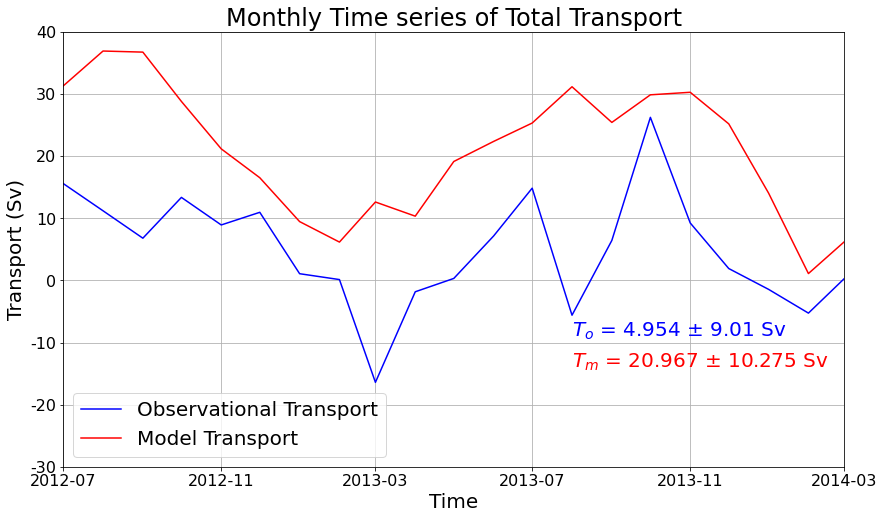

In [51]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)', fontsize=20)
ax.set_xlabel('Time', fontsize=20)
label1 = 'Observational Transport'
label2 = 'Model Transport'
ax.plot(times3, obs_transport, 'b', label=label1)
ax.plot(times3, trans_sv, 'r', label=label2)
ax.text(times3[-8], -9, f'$T_o$ = {obs_mean} $\pm$ {obs_std} Sv', color='b', fontsize=20)
ax.text(times3[-8], -14, f'$T_m$ = {mod_mean} $\pm$ {mod_std} Sv', color='r', fontsize=20)
ax.set_xlim(times3[0], times3[-1])
ax.set_ylim(-30,40)
plt.xticks(times4, times4l, color='k', size=16)
plt.yticks(np.arange(-30,41,10), np.arange(-30,41,10), color='k', size=16)
ax.grid(True)
ax.legend(fontsize=20)
plt.title('Monthly Time series of Total Transport', fontsize=24)
plt.savefig('alltranscomp.png')

## Closing Clusters after use

In [47]:
client.close()
cluster.close()